# Causes of child and infant mortality rates in Africa

### General Overview of the project

Child and infant mortality rates remain a critical issue in Africa, impeding progress toward several
Sustainable Development Goals (SDGs), including Goal 3: Good Health and Well-being. By leveraging
data-driven approaches, this hackathon aims to identify actionable insights, develop innovative
solutions, and contribute to global efforts to reduce preventable deaths in children under five years of age.
Objective
The primary objective is to utilize the provided datasets to uncover patterns, correlations, and key drivers of child and infant mortality in African countries. Participants will propose data-driven strategies and interventions that policymakers, healthcare providers, and organizations can adopt to improve health outcomes for children.

### Objective
The primary objective is to utilize the provided datasets to uncover patterns, correlations, and key drivers of child and infant mortality in African countries. Participants will propose data-driven strategies and interventions that policymakers, healthcare providers, and organizations can adopt to improve health outcomes for children.
1. Identify socioeconomic, healthcare, and environmental factors contributing to high mortality
rates.
2. Propose actionable recommendations to address gaps in vaccination coverage, healthcare
access, and maternal support.
3. Present insights in a format that is understandable to non-technical audience.

### Dataset Overview 
The datasets provided for this project include:
1. Health Protection Coverage: Percentage of populations covered by health
insurance.
2. Global Vaccination Coverage: Vaccination rates for various diseases among
children.
3. Births Attended by Skilled Health Staff: The percentage of births assisted by skilled
healthcare providers.
4. Maternal Deaths by Region: Estimated maternal deaths by region and year.
5. Child Mortality by Income Level: Under-five mortality rates across different
income-level countries.
6. Infant Deaths: Annual number of infant deaths by country.
7. Youth Mortality Rates: Mortality rates for individuals under 15.
8. Causes of Death in Children Under Five: Breakdown of major causes of death
among young children.

## Import the required libraries

In [5]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [6]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from scipy.stats import skew

### Let's Understand the structures of the data

In [7]:
#Read in the data
youth_mortality_rate_df = pd.read_csv(r"C:\Users\EMMAN\Downloads\Infant Mortality Dataset\1. youth-mortality-rate.csv")

number_of_infant_deaths_unwpp_df = pd.read_csv(r"C:\Users\EMMAN\Downloads\Infant Mortality Dataset\2. number-of-infant-deaths-unwpp.csv")

child_mortality_by_income_level_of_country_df = pd.read_csv(r"C:\Users\EMMAN\Downloads\Infant Mortality Dataset\3. child-mortality-by-income-level-of-country.csv")

dist_of_causes_of_death_df = pd.read_csv(r"C:\Users\EMMAN\Downloads\Infant Mortality Dataset\4. Distribution of Causes of Death among Children Aged less than 5 years.csv")

no_of_maternal_df = pd.read_csv(r"C:\Users\EMMAN\Downloads\Infant Mortality Dataset\5. number-of-maternal-deaths-by-region.csv")

births_attended_df = pd.read_csv(r"C:\Users\EMMAN\Downloads\Infant Mortality Dataset\6. births-attended-by-health-staff-sdgs.csv")

global_vaccination_coverage_df = pd.read_csv(r"C:\Users\EMMAN\Downloads\Infant Mortality Dataset\7. global-vaccination-coverage.csv")

health_protection_coverage_df = pd.read_csv(r"C:\Users\EMMAN\Downloads\Infant Mortality Dataset\8. health-protection-coverage.csv")

In [8]:
youth_mortality_rate_df.head()

,Entity,Code,Year,Under-fifteen mortality rate
0,Afghanistan,AFG,1977,30.110573
1,Afghanistan,AFG,1978,29.290777
2,Afghanistan,AFG,1979,28.479010
3,Afghanistan,AFG,1980,27.649078
4,Afghanistan,AFG,1981,26.834482


In [9]:
number_of_infant_deaths_unwpp_df.head()

,Entity,Code,Year,Deaths - Sex: all - Age: 0 - Variant: estimates
0,Afghanistan,AFG,1950,109220.0
1,Afghanistan,AFG,1951,107971.0
2,Afghanistan,AFG,1952,108140.0
3,Afghanistan,AFG,1953,108248.0
4,Afghanistan,AFG,1954,108241.0


In [10]:
child_mortality_by_income_level_of_country_df.head()

,Entity,Code,Year,Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births
0,Afghanistan,AFG,1957,37.245758
1,Afghanistan,AFG,1958,36.626625
2,Afghanistan,AFG,1959,36.043480
3,Afghanistan,AFG,1960,35.459850
4,Afghanistan,AFG,1961,34.894880


In [11]:
dist_of_causes_of_death_df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
1,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
2,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
3,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
4,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z


In [12]:
no_of_maternal_df.head()

,Entity,Code,Year,Estimated maternal deaths,959828-annotations
0,Afghanistan,AFG,1985,10258.5340,NaN
1,Afghanistan,AFG,1986,8671.9210,NaN
2,Afghanistan,AFG,1987,8488.9600,NaN
3,Afghanistan,AFG,1988,7522.1216,NaN
4,Afghanistan,AFG,1989,7549.7050,NaN


In [13]:
births_attended_df.head()

,Entity,Code,Year,Births attended by skilled health staff (% of total)
0,Afghanistan,AFG,2000,12.4
1,Afghanistan,AFG,2003,14.3
2,Afghanistan,AFG,2006,18.9
3,Afghanistan,AFG,2008,24.0
4,Afghanistan,AFG,2010,34.3


In [14]:
global_vaccination_coverage_df.head()

,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0
3,Afghanistan,AFG,1985,17.0,NaN,NaN,NaN,14.0,NaN,15.0,NaN,NaN,NaN,15.0
4,Afghanistan,AFG,1986,18.0,NaN,NaN,NaN,14.0,NaN,11.0,NaN,NaN,NaN,11.0


In [15]:
health_protection_coverage_df.head()

,Entity,Code,Year,Share of population covered by health insurance (ILO (2014))
0,Albania,ALB,2008,23.6
1,Algeria,DZA,2005,85.2
2,American Samoa,ASM,2009,3.0
3,Angola,AGO,2010,0.0
4,Antigua and Barbuda,ATG,2007,51.1


### Data Cleaning

In [16]:
# Remove rows where country name column is a contninent name in the 1st dataset, we can remove them since these contininent name has no code
youth_mortality_rate_df = youth_mortality_rate_df[youth_mortality_rate_df["Code"].notnull()]

# Remove rows where country name column is a contninent name in the 2nd dataset, we can remove them since these contininent name has no code
number_of_infant_deaths_unwpp_df = number_of_infant_deaths_unwpp_df[number_of_infant_deaths_unwpp_df["Code"].notnull()]

# Remove rows where country name column is a contninent name in the 3rd dataset, we can remove them since these contininent name has no code
child_mortality_by_income_level_of_country_df = child_mortality_by_income_level_of_country_df[child_mortality_by_income_level_of_country_df["Code"].notnull()]

# Remove rows where country name column is a contninent name in the 5th dataset, we can remove them since these contininent name has no code
no_of_maternal_df = no_of_maternal_df[no_of_maternal_df["Code"].notnull()]

# Remove rows where country name column is a contninent name in the 6th dataset, we can remove them since these contininent name has no code
births_attended_df = births_attended_df[births_attended_df["Code"].notnull()]

# Remove rows where country name column is a contninent name in the 7th dataset, we can remove them since these contininent name has no code
global_vaccination_coverage_df = global_vaccination_coverage_df[global_vaccination_coverage_df["Code"].notnull()]

### Rename Columns

In [78]:
number_of_infant_deaths_unwpp_df.rename(columns={"Deaths - Sex: all - Age: 0 - Variant: estimates":"deaths"},inplace=True)

child_mortality_by_income_level_of_country_df.rename(columns={'Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births':"wealth quintile"},inplace=True)

dist_of_causes_of_death_df.rename(columns={"Dim1":"Age"},inplace=True)
dist_of_causes_of_death_df.rename(columns={"Dim1ValueCode":"Age Group"},inplace=True)
dist_of_causes_of_death_df.rename(columns={"Dim2":"Cause Of Death"},inplace=True)
dist_of_causes_of_death_df.rename(columns={"Dim2ValueCode":"Cause Of Death Value Code"},inplace=True)
dist_of_causes_of_death_df.rename(columns={"Location":"Entity"},inplace=True)
dist_of_causes_of_death_df.rename(columns={"SpatialDimValueCode":"Code"},inplace=True)
dist_of_causes_of_death_df.rename(columns={"Dim2ValueCode":"Code"},inplace=True)
dist_of_causes_of_death_df.rename(columns={"Period":"Year"},inplace=True)

### Remove Duplicates

In [18]:
# Define a list of datasets
datasets = [
    youth_mortality_rate_df,
    number_of_infant_deaths_unwpp_df,
    child_mortality_by_income_level_of_country_df,
    dist_of_causes_of_death_df,
    no_of_maternal_df,
    births_attended_df,
    global_vaccination_coverage_df,
    health_protection_coverage_df
]

# Remove duplicates from each dataset
for i, df in enumerate(datasets):
    # Drop duplicates and reset the dataset in the list
    datasets[i] = df.drop_duplicates()
    print(f"Dataset {i + 1}: Removed duplicates. Remaining rows: {datasets[i].shape[0]}")
    

Dataset 1: Removed duplicates. Remaining rows: 9492
Dataset 2: Removed duplicates. Remaining rows: 17612
Dataset 3: Removed duplicates. Remaining rows: 12842
Dataset 4: Removed duplicates. Remaining rows: 146664
Dataset 5: Removed duplicates. Remaining rows: 6696
Dataset 6: Removed duplicates. Remaining rows: 2943
Dataset 7: Removed duplicates. Remaining rows: 7645
Dataset 8: Removed duplicates. Remaining rows: 162


### Remove completely empty and unnecessary columns

In [19]:
global_vaccination_coverage_df.dropna(how="all", axis=1, inplace= True)

no_of_maternal_df.drop(columns=['959828-annotations'], inplace=True)

#Remove columns with 1 unique value
dist_of_causes_of_death_df = dist_of_causes_of_death_df.loc[:, dist_of_causes_of_death_df.nunique()>1]

### Correct inconsistent data format and missing values

In [20]:
youth_mortality_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9492 entries, 0 to 10514
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        9492 non-null   object 
 1   Code                          9492 non-null   object 
 2   Year                          9492 non-null   int64  
 3   Under-fifteen mortality rate  9492 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 370.8+ KB


In [21]:
number_of_infant_deaths_unwpp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17612 entries, 0 to 18943
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Entity  17612 non-null  object 
 1   Code    17612 non-null  object 
 2   Year    17612 non-null  int64  
 3   deaths  17612 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 688.0+ KB


In [22]:
child_mortality_by_income_level_of_country_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12842 entries, 0 to 14199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entity           12842 non-null  object 
 1   Code             12842 non-null  object 
 2   Year             12842 non-null  int64  
 3   wealth quintile  12842 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 501.6+ KB


In [23]:
dist_of_causes_of_death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146664 entries, 0 to 146663
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ParentLocationCode         146664 non-null  object 
 1   ParentLocation             146664 non-null  object 
 2   Code                       146664 non-null  object 
 3   Entity                     146664 non-null  object 
 4   Year                       146664 non-null  int64  
 5   IsLatestYear               146664 non-null  bool   
 6   Age                        146664 non-null  object 
 7   Age Group                  146664 non-null  object 
 8   Cause Of Death             146664 non-null  object 
 9   Cause Of Death Value Code  146664 non-null  object 
 10  FactValueNumeric           146664 non-null  float64
 11  Value                      146664 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 12.4+ MB


In [24]:
no_of_maternal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6696 entries, 0 to 7055
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     6696 non-null   object 
 1   Code                       6696 non-null   object 
 2   Year                       6696 non-null   int64  
 3   Estimated maternal deaths  6696 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 261.6+ KB


In [25]:
births_attended_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 0 to 2984
Data columns (total 4 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Entity                                                2943 non-null   object 
 1   Code                                                  2943 non-null   object 
 2   Year                                                  2943 non-null   int64  
 3   Births attended by skilled health staff (% of total)  2943 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 115.0+ KB


In [26]:
global_vaccination_coverage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7645 entries, 0 to 7896
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Entity                                7645 non-null   object 
 1   Code                                  7645 non-null   object 
 2   Year                                  7645 non-null   int64  
 3   BCG (% of one-year-olds immunized)    6245 non-null   float64
 4   HepB3 (% of one-year-olds immunized)  4214 non-null   float64
 5   Hib3 (% of one-year-olds immunized)   3437 non-null   float64
 6   IPV1 (% of one-year-olds immunized)   1255 non-null   float64
 7   MCV1 (% of one-year-olds immunized)   7476 non-null   float64
 8   PCV3 (% of one-year-olds immunized)   1413 non-null   float64
 9   Pol3 (% of one-year-olds immunized)   7603 non-null   float64
 10  RCV1 (% of one-year-olds immunized)   3946 non-null   float64
 11  RotaC (% of one-y

In [27]:
health_protection_coverage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        162 non-null    object 
 1   Code                                                          162 non-null    object 
 2   Year                                                          162 non-null    int64  
 3   Share of population covered by health insurance (ILO (2014))  162 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.2+ KB


### Fill missing Values

##### Global Vaccination coverage has a lot of missing values, let's investigate

In [28]:
global_missing_percent = (global_vaccination_coverage_df.isnull().sum()/global_vaccination_coverage_df.shape[0])*100
print(global_missing_percent)

Entity                                   0.000000
Code                                     0.000000
Year                                     0.000000
BCG (% of one-year-olds immunized)      18.312623
HepB3 (% of one-year-olds immunized)    44.879006
Hib3 (% of one-year-olds immunized)     55.042511
IPV1 (% of one-year-olds immunized)     83.584042
MCV1 (% of one-year-olds immunized)      2.210595
PCV3 (% of one-year-olds immunized)     81.517332
Pol3 (% of one-year-olds immunized)      0.549379
RCV1 (% of one-year-olds immunized)     48.384565
RotaC (% of one-year-olds immunized)    87.665141
YFV (% of one-year-olds immunized)      90.202747
DTP3 (% of one-year-olds immunized)      0.562459
dtype: float64


#### Remove columns where missing percentage is less than or equal to 50%

In [79]:
# Filter columns where missing percentage is less than or equal to 50%
columns_to_keep = global_missing_percent[global_missing_percent <= 50].index

# Drop columns with more than 50% missing values
global_vaccination_coverage_df = global_vaccination_coverage_df[columns_to_keep]

#### Check for skewness to determine whether to fill missing values with median or mean

In [81]:
#Check for skewness to determine whether to fill with median or mean
hepb3_skewness = global_vaccination_coverage_df['HepB3 (% of one-year-olds immunized)'].skew()
bcg_skewness = global_vaccination_coverage_df['BCG (% of one-year-olds immunized)'].skew()
mcv1_skewness = global_vaccination_coverage_df['MCV1 (% of one-year-olds immunized)'].skew()
pol3_skewness = global_vaccination_coverage_df['Pol3 (% of one-year-olds immunized)'].skew()
rcv1_skewness = global_vaccination_coverage_df['RCV1 (% of one-year-olds immunized)'].skew()
dtp3_skewness = global_vaccination_coverage_df['DTP3 (% of one-year-olds immunized)'].skew()

print(f"hepb3_skewness: {hepb3_skewness}")
print(f"bcg_skewness: {bcg_skewness}")
print(f"mcv1_skewness: {mcv1_skewness}")
print(f"pol3_skewness: {pol3_skewness}")
print(f"rcv1_skewness: {rcv1_skewness}")
print(f"dtp3_skewness: {dtp3_skewness}")

hepb3_skewness: -3.25207418530819
bcg_skewness: -2.2805710144263323
mcv1_skewness: -1.4063178175329014
pol3_skewness: -1.6149773702403927
rcv1_skewness: -4.574382341813077
dtp3_skewness: -1.529525615328844


In [82]:
# Since all columns are left-skewed so we fill missing valuess with the median

In [84]:
global_vaccination_coverage_df['BCG (% of one-year-olds immunized)'] = global_vaccination_coverage_df['BCG (% of one-year-olds immunized)'].fillna(global_vaccination_coverage_df['BCG (% of one-year-olds immunized)'].median())
global_vaccination_coverage_df['DTP3 (% of one-year-olds immunized)'] = global_vaccination_coverage_df['DTP3 (% of one-year-olds immunized)'].fillna(global_vaccination_coverage_df['DTP3 (% of one-year-olds immunized)'].median())
global_vaccination_coverage_df['HepB3 (% of one-year-olds immunized)'] = global_vaccination_coverage_df['HepB3 (% of one-year-olds immunized)'].fillna(global_vaccination_coverage_df['HepB3 (% of one-year-olds immunized)'].median())
global_vaccination_coverage_df['MCV1 (% of one-year-olds immunized)'] = global_vaccination_coverage_df['MCV1 (% of one-year-olds immunized)'].fillna(global_vaccination_coverage_df['MCV1 (% of one-year-olds immunized)'].median())
global_vaccination_coverage_df['Pol3 (% of one-year-olds immunized)'] = global_vaccination_coverage_df['Pol3 (% of one-year-olds immunized)'].fillna(global_vaccination_coverage_df['Pol3 (% of one-year-olds immunized)'].median())
global_vaccination_coverage_df['RCV1 (% of one-year-olds immunized)'] = global_vaccination_coverage_df['RCV1 (% of one-year-olds immunized)'].fillna(global_vaccination_coverage_df['RCV1 (% of one-year-olds immunized)'].median())

#### Now we need to confirm if there any missing values left

In [86]:
global_vaccination_coverage_df.isnull().sum()

Entity                                  0
Code                                    0
Year                                    0
BCG (% of one-year-olds immunized)      0
HepB3 (% of one-year-olds immunized)    0
MCV1 (% of one-year-olds immunized)     0
Pol3 (% of one-year-olds immunized)     0
RCV1 (% of one-year-olds immunized)     0
DTP3 (% of one-year-olds immunized)     0
dtype: int64

### Data Transformations

In [88]:
# Group wealth quintile for better understanding

child_mortality_by_income_level_of_country_df["Wealth group"] = pd.qcut(child_mortality_by_income_level_of_country_df["wealth quintile"], 
                                                                    q=5, 
        labels=["Very Poor", "Poor", "Average Wealth", "Wealthy", "Very Wealthy"])

In [89]:
# Combine dataframes
# Start with the first DataFrame
combined_df = youth_mortality_rate_df

# List of other DataFrames to merge
dataframes_to_merge = [
    number_of_infant_deaths_unwpp_df,
    child_mortality_by_income_level_of_country_df,
    births_attended_df,
    no_of_maternal_df,
    health_protection_coverage_df,
    dist_of_causes_of_death_df,
    global_vaccination_coverage_df
]

# Merge each DataFrame in the list with the combined DataFrame
for df in dataframes_to_merge:
    combined_df = pd.merge(combined_df, df, on=["Entity", "Code", "Year"], how="inner")


In [90]:
#Create a new column with the average of all immunization factors
combined_df["Avg % of one-year-olds immunized"] = (combined_df['BCG (% of one-year-olds immunized)']+ combined_df['DTP3 (% of one-year-olds immunized)']+ combined_df['HepB3 (% of one-year-olds immunized)']+ combined_df['MCV1 (% of one-year-olds immunized)'] +combined_df['Pol3 (% of one-year-olds immunized)']+combined_df['RCV1 (% of one-year-olds immunized)'])/5

In [91]:
# To export cleaned data

import os

# Define the destination folder for the exported files
destination_folder = r"C:\Users\EMMAN\Downloads\Infant Mortality Dataset 4"

# Ensure the folder exists (create it if it doesn't)
os.makedirs(destination_folder, exist_ok=True)

# Define a dictionary with dataset names and their corresponding DataFrames
cleaned_datasets = {
    "1.youth_mortality_rate_df": youth_mortality_rate_df,
    "2.number_of_infant_deaths_unwpp_df":number_of_infant_deaths_unwpp_df,
    "3.child_mortality_by_income_level_of_country_df":child_mortality_by_income_level_of_country_df,
    "4.dist_of_causes_of_death_df": dist_of_causes_of_death_df,
    "5.no_of_maternal_df": no_of_maternal_df,
    "6.births_attended_df": births_attended_df,
    "7.global_vaccination_coverage_df": global_vaccination_coverage_df,
    "8.health_protection_coverage_df": health_protection_coverage_df,
    "combined_df": combined_df
}

# Export each DataFrame as a CSV to the specified destination folder
for name, dataframe in cleaned_datasets.items():
    dataframe.to_csv(os.path.join(destination_folder, f"{name}.csv"), index=False)

In [92]:
child_mortality_by_income_level_of_country_df

,Entity,Code,Year,wealth quintile,Wealth group
0,Afghanistan,AFG,1957,37.245758,Very Wealthy
1,Afghanistan,AFG,1958,36.626625,Very Wealthy
2,Afghanistan,AFG,1959,36.043480,Very Wealthy
3,Afghanistan,AFG,1960,35.459850,Very Wealthy
4,Afghanistan,AFG,1961,34.894880,Very Wealthy
...,...,...,...,...,...
14195,Zimbabwe,ZWE,2018,5.337321,Average Wealth
14196,Zimbabwe,ZWE,2019,5.237655,Average Wealth
14197,Zimbabwe,ZWE,2020,5.143166,Average Wealth
14198,Zimbabwe,ZWE,2021,4.908745,Average Wealth


## Exploratory Data Analysis

#### Under-15 mortality rate

In [93]:
# Basic statistics
print(youth_mortality_rate_df["Under-fifteen mortality rate"].describe())

count    9492.000000
mean        6.523659
std         7.145075
min         0.190339
25%         1.670497
50%         3.500941
75%         8.940179
max        59.586483
Name: Under-fifteen mortality rate, dtype: float64


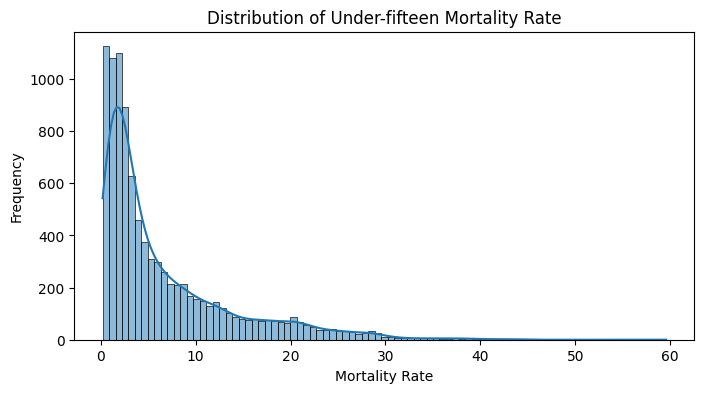

In [94]:
# Plotting distribution (Histogram)
plt.figure(figsize=(8, 4))
sns.histplot(youth_mortality_rate_df["Under-fifteen mortality rate"], kde=True)
plt.title("Distribution of Under-fifteen Mortality Rate")
plt.xlabel("Mortality Rate")
plt.ylabel("Frequency")
plt.show()

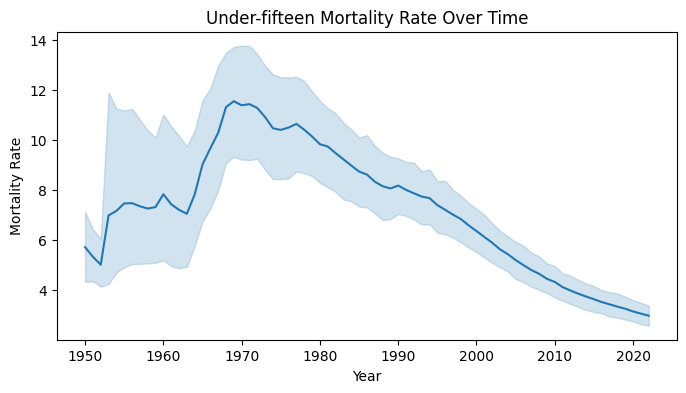

In [95]:
# Time series plot (assuming 'Year' and 'Under-fifteen mortality rate' columns exist)
plt.figure(figsize=(8, 4))
sns.lineplot(data=youth_mortality_rate_df, x="Year", y="Under-fifteen mortality rate")
plt.title("Under-fifteen Mortality Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.show()

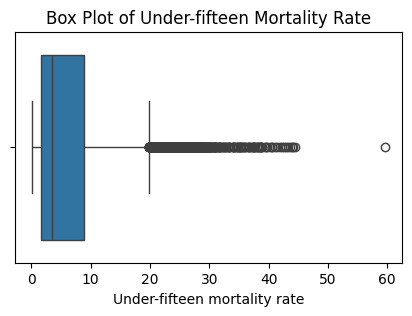

In [96]:
# Box plot to detect outliers
plt.figure(figsize=(5,3))
sns.boxplot(x=youth_mortality_rate_df["Under-fifteen mortality rate"])
plt.title("Box Plot of Under-fifteen Mortality Rate")
plt.show()

#### No of Infant deaths

In [97]:
# Basic statistics
print(number_of_infant_deaths_unwpp_df["deaths"].describe())

count    1.761200e+04
mean     7.593898e+04
std      6.456919e+05
min      0.000000e+00
25%      1.410000e+02
50%      2.263500e+03
75%      2.038950e+04
max      1.351450e+07
Name: deaths, dtype: float64


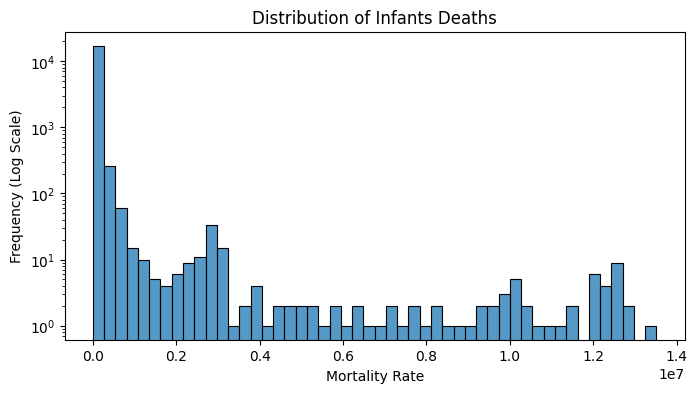

In [98]:
plt.figure(figsize=(8, 4))
sns.histplot(data=number_of_infant_deaths_unwpp_df, x="deaths", bins=50)

plt.yscale("log")  # Set the y-axis to a logarithmic scale
plt.title("Distribution of Infants Deaths")
plt.xlabel("Mortality Rate")
plt.ylabel("Frequency (Log Scale)")
plt.show()


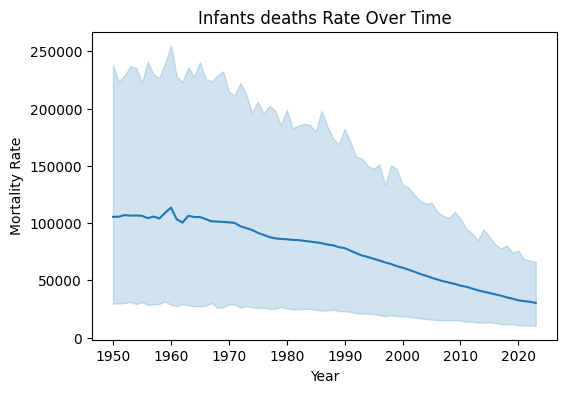

In [99]:
# Time series plot (assuming 'Year' and 'Under-fifteen mortality rate' columns exist)
plt.figure(figsize=(6, 4))
sns.lineplot(number_of_infant_deaths_unwpp_df, x="Year", y="deaths")
plt.title("Infants deaths Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.show()

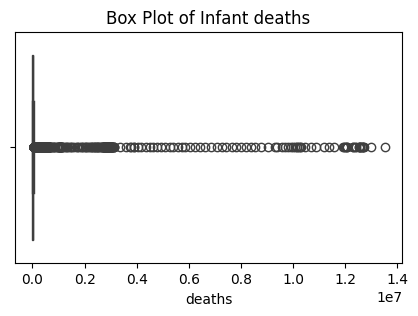

In [100]:
# Box plot to detect outliers
plt.figure(figsize=(5,3))
sns.boxplot(x=number_of_infant_deaths_unwpp_df["deaths"])
plt.title("Box Plot of Infant deaths")
plt.show()

#### What caused most of the deaths

In [101]:
combined_df['Cause Of Death'].value_counts()

Other noncommunicable diseases                              273
Injuries                                                    273
HIV/AIDS                                                    273
Diarrhoeal diseases                                         273
Tetanus                                                     273
Measles                                                     273
Meningitis/encephalitis                                     273
Malaria                                                     273
Acute lower respiratory infections                          273
Birth asphyxia and birth trauma                             273
Sepsis and other infectious conditions of the newborn       273
Prematurity                                                 273
Other communicable, perinatal and nutritional conditions    273
Congenital anomalies                                        273
Name: Cause Of Death, dtype: int64

#### Which age group was most affected

In [102]:
combined_df['Age'].value_counts()

0-27 days      1274
1-59 months    1274
0-4 years      1274
Name: Age, dtype: int64

#### Which Wealth group has the most deaths

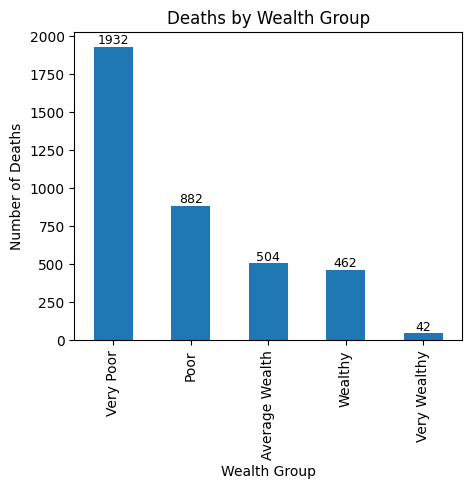

In [103]:
wealth_group_death = combined_df['Wealth group'].value_counts().head(10)

plt.figure(figsize=(5, 4))
wealth_group_death.plot(kind="bar")

plt.xlabel("Wealth Group")
plt.ylabel("Number of Deaths")
plt.title("Deaths by Wealth Group")

#data labels
for index, value in enumerate(wealth_group_death):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.show()

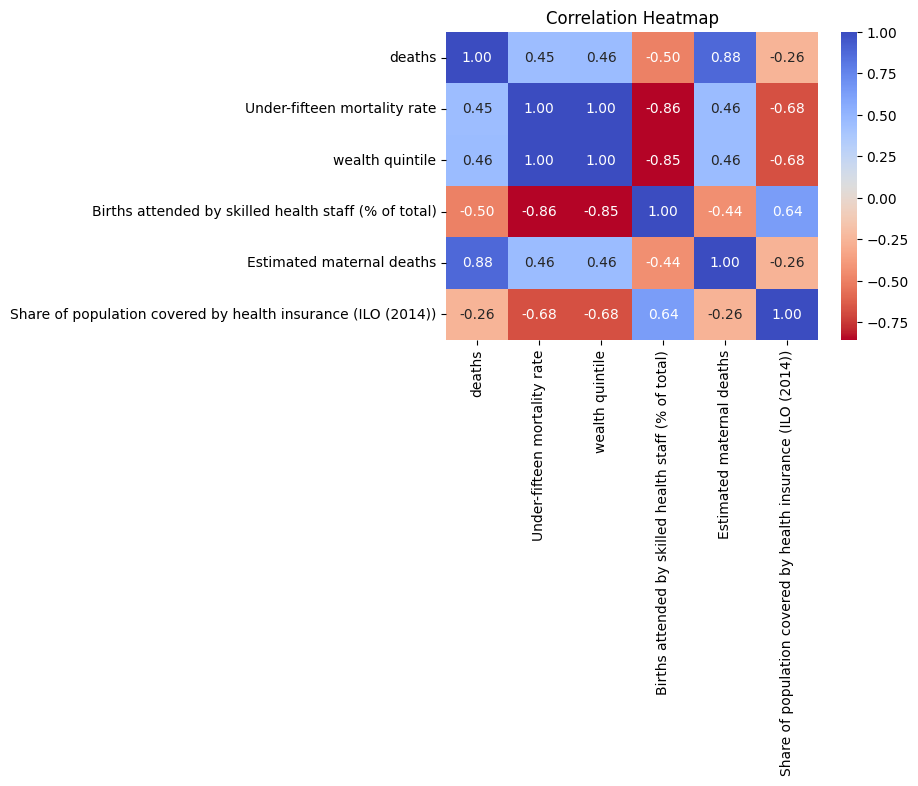

In [104]:
plt.figure(figsize=(6, 4))

columns = ['deaths','Under-fifteen mortality rate',  'wealth quintile', 'Births attended by skilled health staff (% of total)',
       'Estimated maternal deaths', 'Share of population covered by health insurance (ILO (2014))']

#Create a table for the columns needed
subset_df = combined_df[columns]

#Calculate correlation
corr = subset_df.corr()

# Create the heatmap using seaborn
sns.heatmap(corr, annot=True, cmap="coolwarm_r", fmt=".2f")

plt.title("Correlation Heatmap")

# Show the heatmap
plt.show()

##### A positive correlation of Wealth quintile and death is counterintuitive, so there is a need to investigate what is wrong with the column wealth quintile

Correlation between wealth quintile and health insurance coverage: -0.6785370795068157


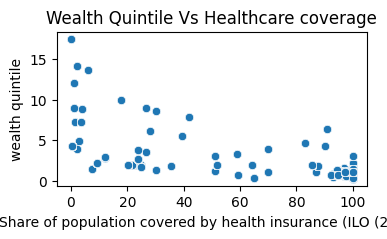

In [105]:
# Let's see the relationship between wealth quintile and Healthcare coverage

plt.figure(figsize=(4, 2))
plt.title("Wealth Quintile Vs Healthcare coverage")

sns.scatterplot(x="Share of population covered by health insurance (ILO (2014))", y= "wealth quintile", data= combined_df)

Wealth_Quintile_vs_Healthcare_coverage = combined_df[['Share of population covered by health insurance (ILO (2014))',
                                                                                 'wealth quintile']]

#calculate correlation factor
correlation = Wealth_Quintile_vs_Healthcare_coverage["Share of population covered by health insurance (ILO (2014))"].corr(
    Wealth_Quintile_vs_Healthcare_coverage["wealth quintile"]
)

# Print the correlation value
print("Correlation between wealth quintile and health insurance coverage:", correlation)


#### Observation confirmed
The scatterplot shows a negative correlation with healthcare coverage and the correlation factor is negative, this is counterintuitive as we have 
seen very wealthy group has the least number of deaths. Also, its negative correlation with deaths and healthcare coverage indicates wealth quntile has a reverse coding/scaling meaning lower wealth quintile represents wealthier regions

#### Reverse Wealth quintile scaling

In [106]:
# Reverse coding the 'wealth quintile' column
min_value = combined_df["wealth quintile"].min()
max_value = combined_df["wealth quintile"].max()

# Apply reverse coding
combined_df["wealth quintile reversed"] = (max_value + min_value) - combined_df["wealth quintile"]

# Display the stats for the reversed column
print(combined_df["wealth quintile reversed"].describe())

count    3822.000000
mean       14.951138
std         3.443593
min         0.269074
25%        14.231549
50%        16.339526
75%        17.181069
max        17.524014
Name: wealth quintile reversed, dtype: float64


New Correlation between wealth quintile reversed and health insurance coverage: 0.6785370795068156


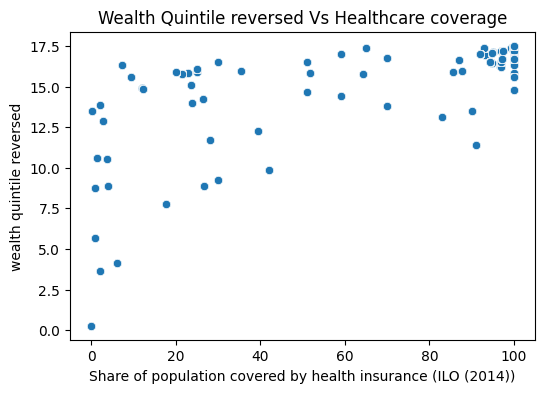

In [107]:
#Test the reverse coding

new_Wealth_Quintile_vs_Healthcare_coverage = combined_df[['Share of population covered by health insurance (ILO (2014))',
                                                                                 'wealth quintile reversed']]

#calculate correlation factor
correlation = new_Wealth_Quintile_vs_Healthcare_coverage["Share of population covered by health insurance (ILO (2014))"].corr(
    new_Wealth_Quintile_vs_Healthcare_coverage["wealth quintile reversed"]
)

plt.figure(figsize=(6, 4))
plt.title("Wealth Quintile reversed Vs Healthcare coverage")
sns.scatterplot(x="Share of population covered by health insurance (ILO (2014))", y= "wealth quintile reversed", data= combined_df)

# Print the correlation value
print("New Correlation between wealth quintile reversed and health insurance coverage:", correlation)

#### Wealth quintile has been successfully reverse coded, we need to remove the original column

In [108]:
#drop original column
combined_df.drop(columns='wealth quintile', inplace=True)

#Rename column
combined_df.rename(columns={'wealth quintile reversed':'wealth quintile'},inplace=True)

#### Now, Let's see the factors affecting child and infant mortality

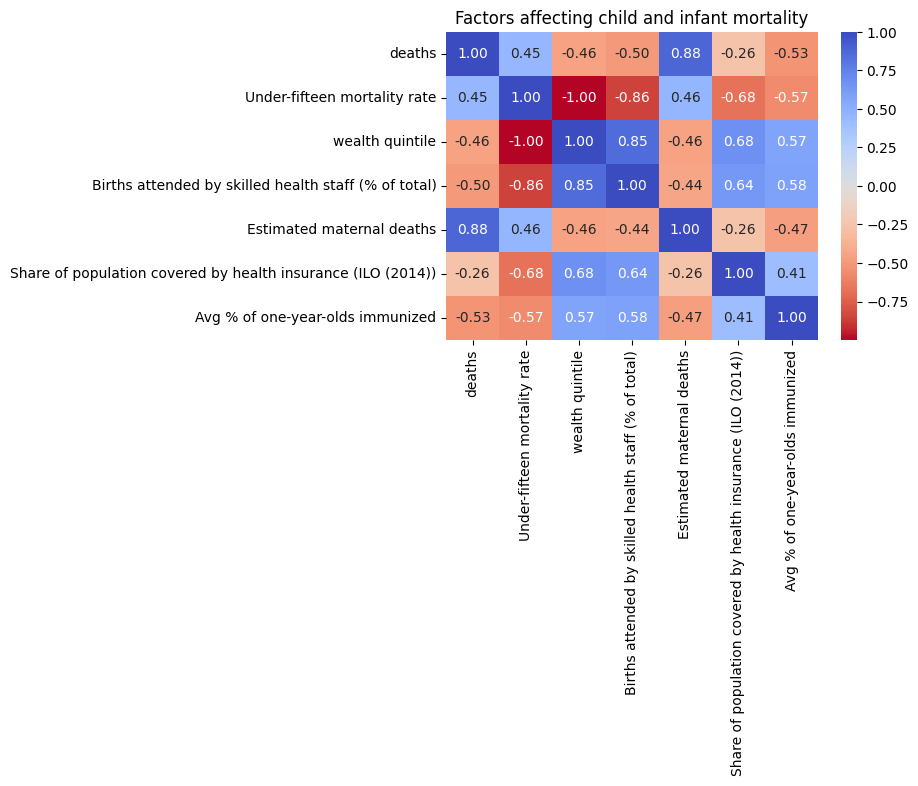

deaths                                                          1.000000
Under-fifteen mortality rate                                    0.452806
wealth quintile                                                -0.459617
Births attended by skilled health staff (% of total)           -0.498732
Estimated maternal deaths                                       0.880157
Share of population covered by health insurance (ILO (2014))   -0.260780
Avg % of one-year-olds immunized                               -0.525443
Name: deaths, dtype: float64


In [109]:
plt.figure(figsize=(6, 4))

columns = ['deaths','Under-fifteen mortality rate',  'wealth quintile', 'Births attended by skilled health staff (% of total)',
       'Estimated maternal deaths', 'Share of population covered by health insurance (ILO (2014))','Avg % of one-year-olds immunized']

#Create a table for the columns needed
subset_df = combined_df[columns]

#Calculate correlation
corr = subset_df.corr()

# Create the heatmap using seaborn
sns.heatmap(corr, annot=True, cmap="coolwarm_r", fmt=".2f")

plt.title("Factors affecting child and infant mortality")

# Show the heatmap
plt.show()

#Print the correlation of total death with factors affecting it
death_corr = corr.loc["deaths"]
print(death_corr)

## Insights

#### 1. Socioeconomic Factors

a. Poverty and Wealth Inequities:

"Very Poor" wealth group has the highest number of deaths.
The heatmap indicates a strong negative correlation between the wealth quintile and mortality rates (e.g., -0.46). Wealthier populations have better access to healthcare, nutrition and education.
Poverty leads to poor living conditions, malnutrition and inability to afford health services.

b. Health Insurance Coverage:
Low insurance coverage (-0.26 correlation with under-fifteen mortality) limits access to essential maternal and infant healthcare services.
This exacerbates disparities between socioeconomic groups.

c. Education and Awareness:
Lack of education especially among mothers, reduces awareness of proper child care, hygiene and vaccination importance.
Correlation between wealth and maternal health outcomes highlights that uneducated or impoverished communities are at a greater risk.

#### 2. Healthcare Factors

a. Inadequate Access to Skilled Birth Attendants:
The strong negative correlation (-0.50) between skilled health staff attendance and mortality rates indicates that many births occur without professional care.
Poor infrastructure and insufficient healthcare personnel contribute to preventable deaths during birth.

b. Maternal Health Support:
Correlation between maternal deaths and infant mortality (+0.88) indicates poor maternal health has a direct impact on child survival rates.
Lack of prenatal and postnatal care increases risks for birth complications and premature births.

c. Insufficient Vaccination Coverage:
Vaccine-preventable diseases like measles, tetanus, meningitis and malaria (mentioned in the causes of death) remain prevalent in regions with limited vaccination programs. It has a correlation of (-0.52) with the overall deaths

d. Overburdened and Underfunded Health Systems:
Limited funding, equipment shortages and overburdened facilities in rural and poor areas reduce the quality of care.

# Recommendations

#### 1. Address Gaps in Vaccination Coverage

Challenge Identified: High mortality from vaccine-preventable diseases such as measles, tetanus, and meningitis.

Solutions:

a. Strengthen Immunization Programs:
- Scale up outreach programs to reach remote and underserved areas.
- Deploy mobile vaccination clinics in rural areas where healthcare facilities are lacking.

b. Improve Vaccine Supply Chain Management:
- Ensure cold chain logistics for proper vaccine storage and distribution.
- Reduce stockouts by implementing real-time monitoring systems.

c. Community Engagement and Education:
- Conduct awareness campaigns to combat vaccine hesitancy and misinformation.
- Partner with community leaders to promote immunization programs.

d. Incentivize Vaccination:
- Provide incentives such as food packages or childcare essentials for families completing immunization schedules.


#### 2. Improve Healthcare Access

Challenge Identified: Limited healthcare infrastructure, shortage of skilled health workers and poor access in remote regions.

Solutions:

a. Expand Health Infrastructure:
- Build and upgrade primary healthcare facilities in underserved areas.
- Invest in telemedicine to connect remote areas with specialized medical services.

b. Train and Deploy Skilled Health Workers:
- Increase training for community health workers to deliver essential care.
- Incentivize health professionals (e.g., higher salaries, housing benefits) to work in rural areas.

c. Improve Affordability of Healthcare:
- Introduce health insurance schemes tailored for low-income families.
- Provide free or subsidized healthcare for children and pregnant women.


#### 3. Enhance Maternal and Neonatal Support

Challenges Identified: High mortality due to birth asphyxia, prematurity, and sepsis, indicating inadequate maternal care.

Solutions:

a. Strengthen Antenatal and Postnatal Care:
- Ensure all pregnant women attend at least four antenatal visits for proper monitoring.
- Promote early postnatal check-ups to prevent complications for mothers and newborns.

b. Ensure Skilled Birth Attendance:
- Scale up training and deployment of midwives and skilled birth attendants.
- Encourage facility-based deliveries through maternal incentives (e.g., free delivery kits).
  
c. Promote Family Planning and Reproductive Health:
- Expand access to contraceptives to reduce high-risk pregnancies.
- Offer reproductive health education to empower women and families.

d. Address Nutrition and Anemia:
- Provide iron supplements and balanced nutrition programs for expectant mothers.
- Promote breastfeeding and support proper infant nutrition.

#### Other Recommendations:

a. Data Collection and Monitoring:

- Implement systems for real-time data collection on vaccination rates, maternal health, and infant mortality to identify gaps quickly.

b. Collaborate with International Partners:

- Leverage support from organizations like WHO, UNICEF, and other global health partners to fund and implement large-scale health initiatives.

c. Promote Clean Water and Sanitation:

d. Improve access to clean water to combat diarrheal diseases.
e. Educate communities on hygiene and sanitation practices.